In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import datetime as dt

warnings.filterwarnings("ignore")

from sklearn.neighbors import KNeighborsRegressor

In [2]:
df=pd.read_csv(r'C:\Users\Ganesh Jaiswar\Desktop\ODINSCHOOL\EDA AND ML\Price Prediction\archive (1)\data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [5]:
df.shape

(4600, 18)

In [6]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [7]:
categorical_data=df.select_dtypes('object')
categorical_data

,date,street,city,statezip,country
0,02-05-2014 00:00,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 00:00,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 00:00,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 00:00,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...
4595,09-07-2014 00:00,501 N 143rd St,Seattle,WA 98133,USA
4596,09-07-2014 00:00,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,09-07-2014 00:00,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,10-07-2014 00:00,5148 S Creston St,Seattle,WA 98178,USA


In [8]:
numerical_data=df.select_dtypes('int')
numerical_data

,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3,1340,7912,0,0,3,1340,0,1955,2005
1,5,3650,9050,0,4,5,3370,280,1921,0
2,3,1930,11947,0,0,4,1930,0,1966,0
3,3,2000,8030,0,0,4,1000,1000,1963,0
4,4,1940,10500,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...
4595,3,1510,6360,0,0,4,1510,0,1954,1979
4596,3,1460,7573,0,0,3,1460,0,1983,2009
4597,3,3010,7014,0,0,3,3010,0,2009,0
4598,4,2090,6630,0,0,3,1070,1020,1974,0


# Visulaization 

In [9]:
count=df['bedrooms'].value_counts()
index=count.index
print(index)

Index([3, 4, 2, 5, 6, 1, 7, 8, 0, 9], dtype='int64', name='bedrooms')


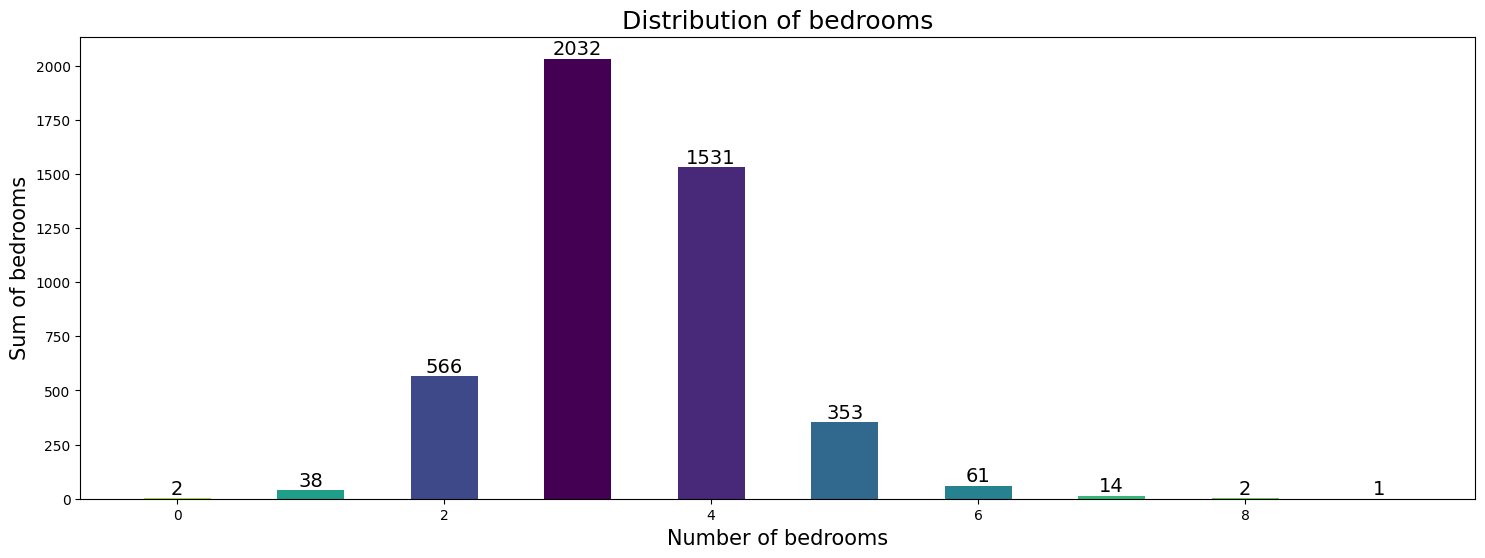

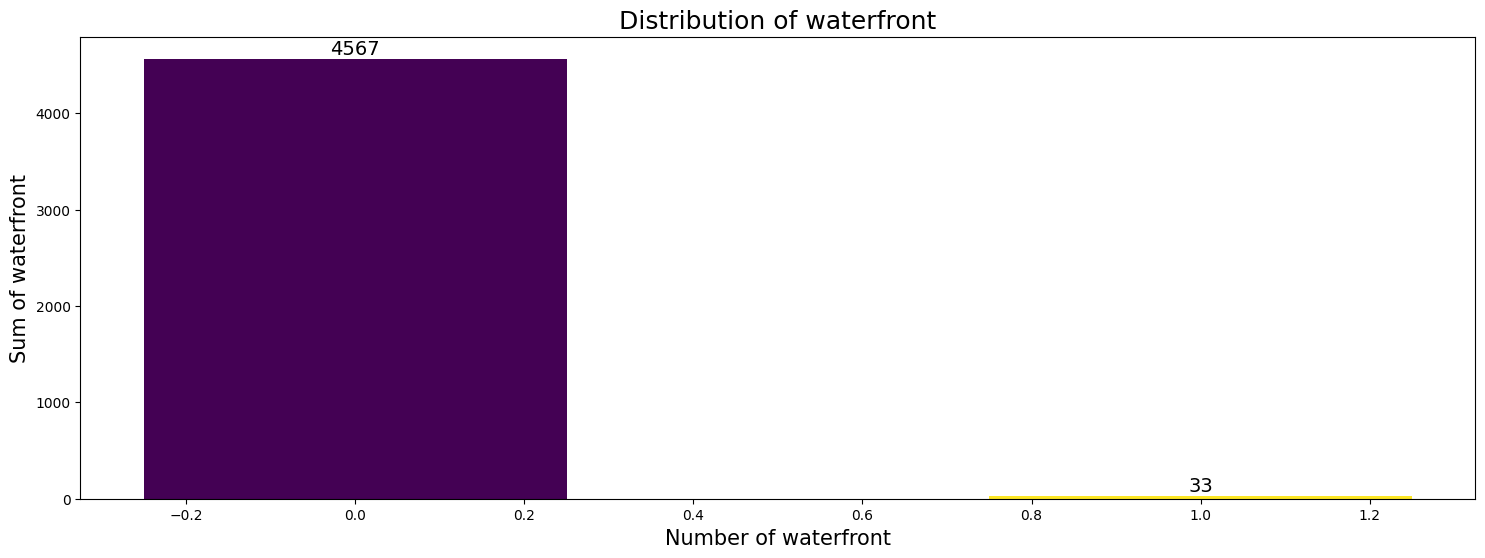

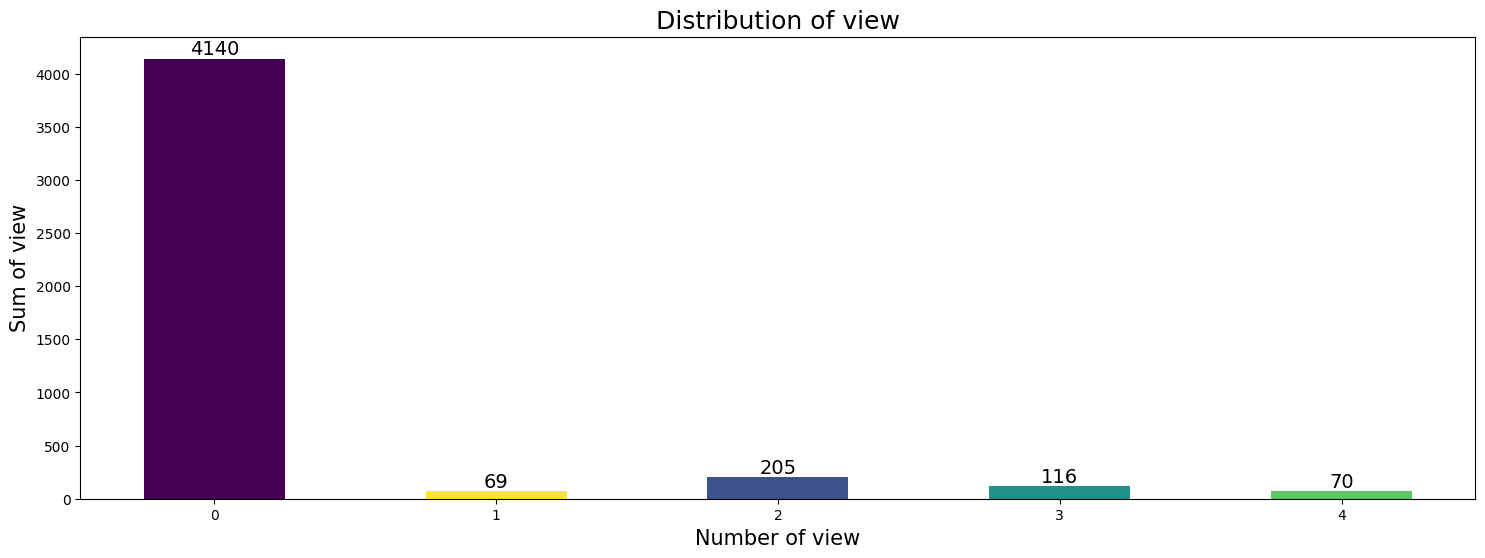

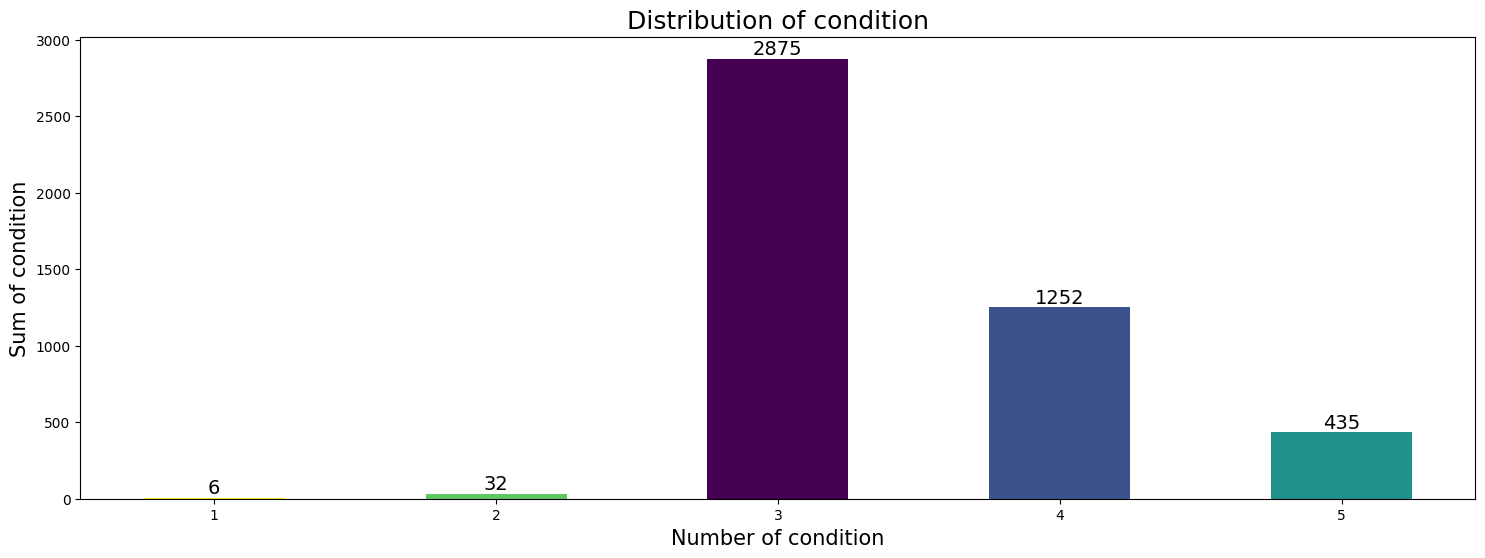

In [10]:

for i in ['bedrooms','waterfront','view','condition']:
    count=df[i].value_counts()
    index=count.index
    color=plt.cm.viridis(np.linspace(0, 1, len(index)))
    plt.figure(figsize=(18,6))
    bar_plot=plt.bar(x=index,height=count,width=0.5,color=color)
    plt.bar_label(bar_plot,labels=count,label_type='edge',color='black',fontsize=14)
    plt.title(f'Distribution of {i}',fontsize=18)
    plt.xlabel(f'Number of {i}', fontdict={'size': 15, 'color': 'black'})
    plt.ylabel(f'Sum of {i}',fontsize=15)
    plt.xticks()
    plt.show()

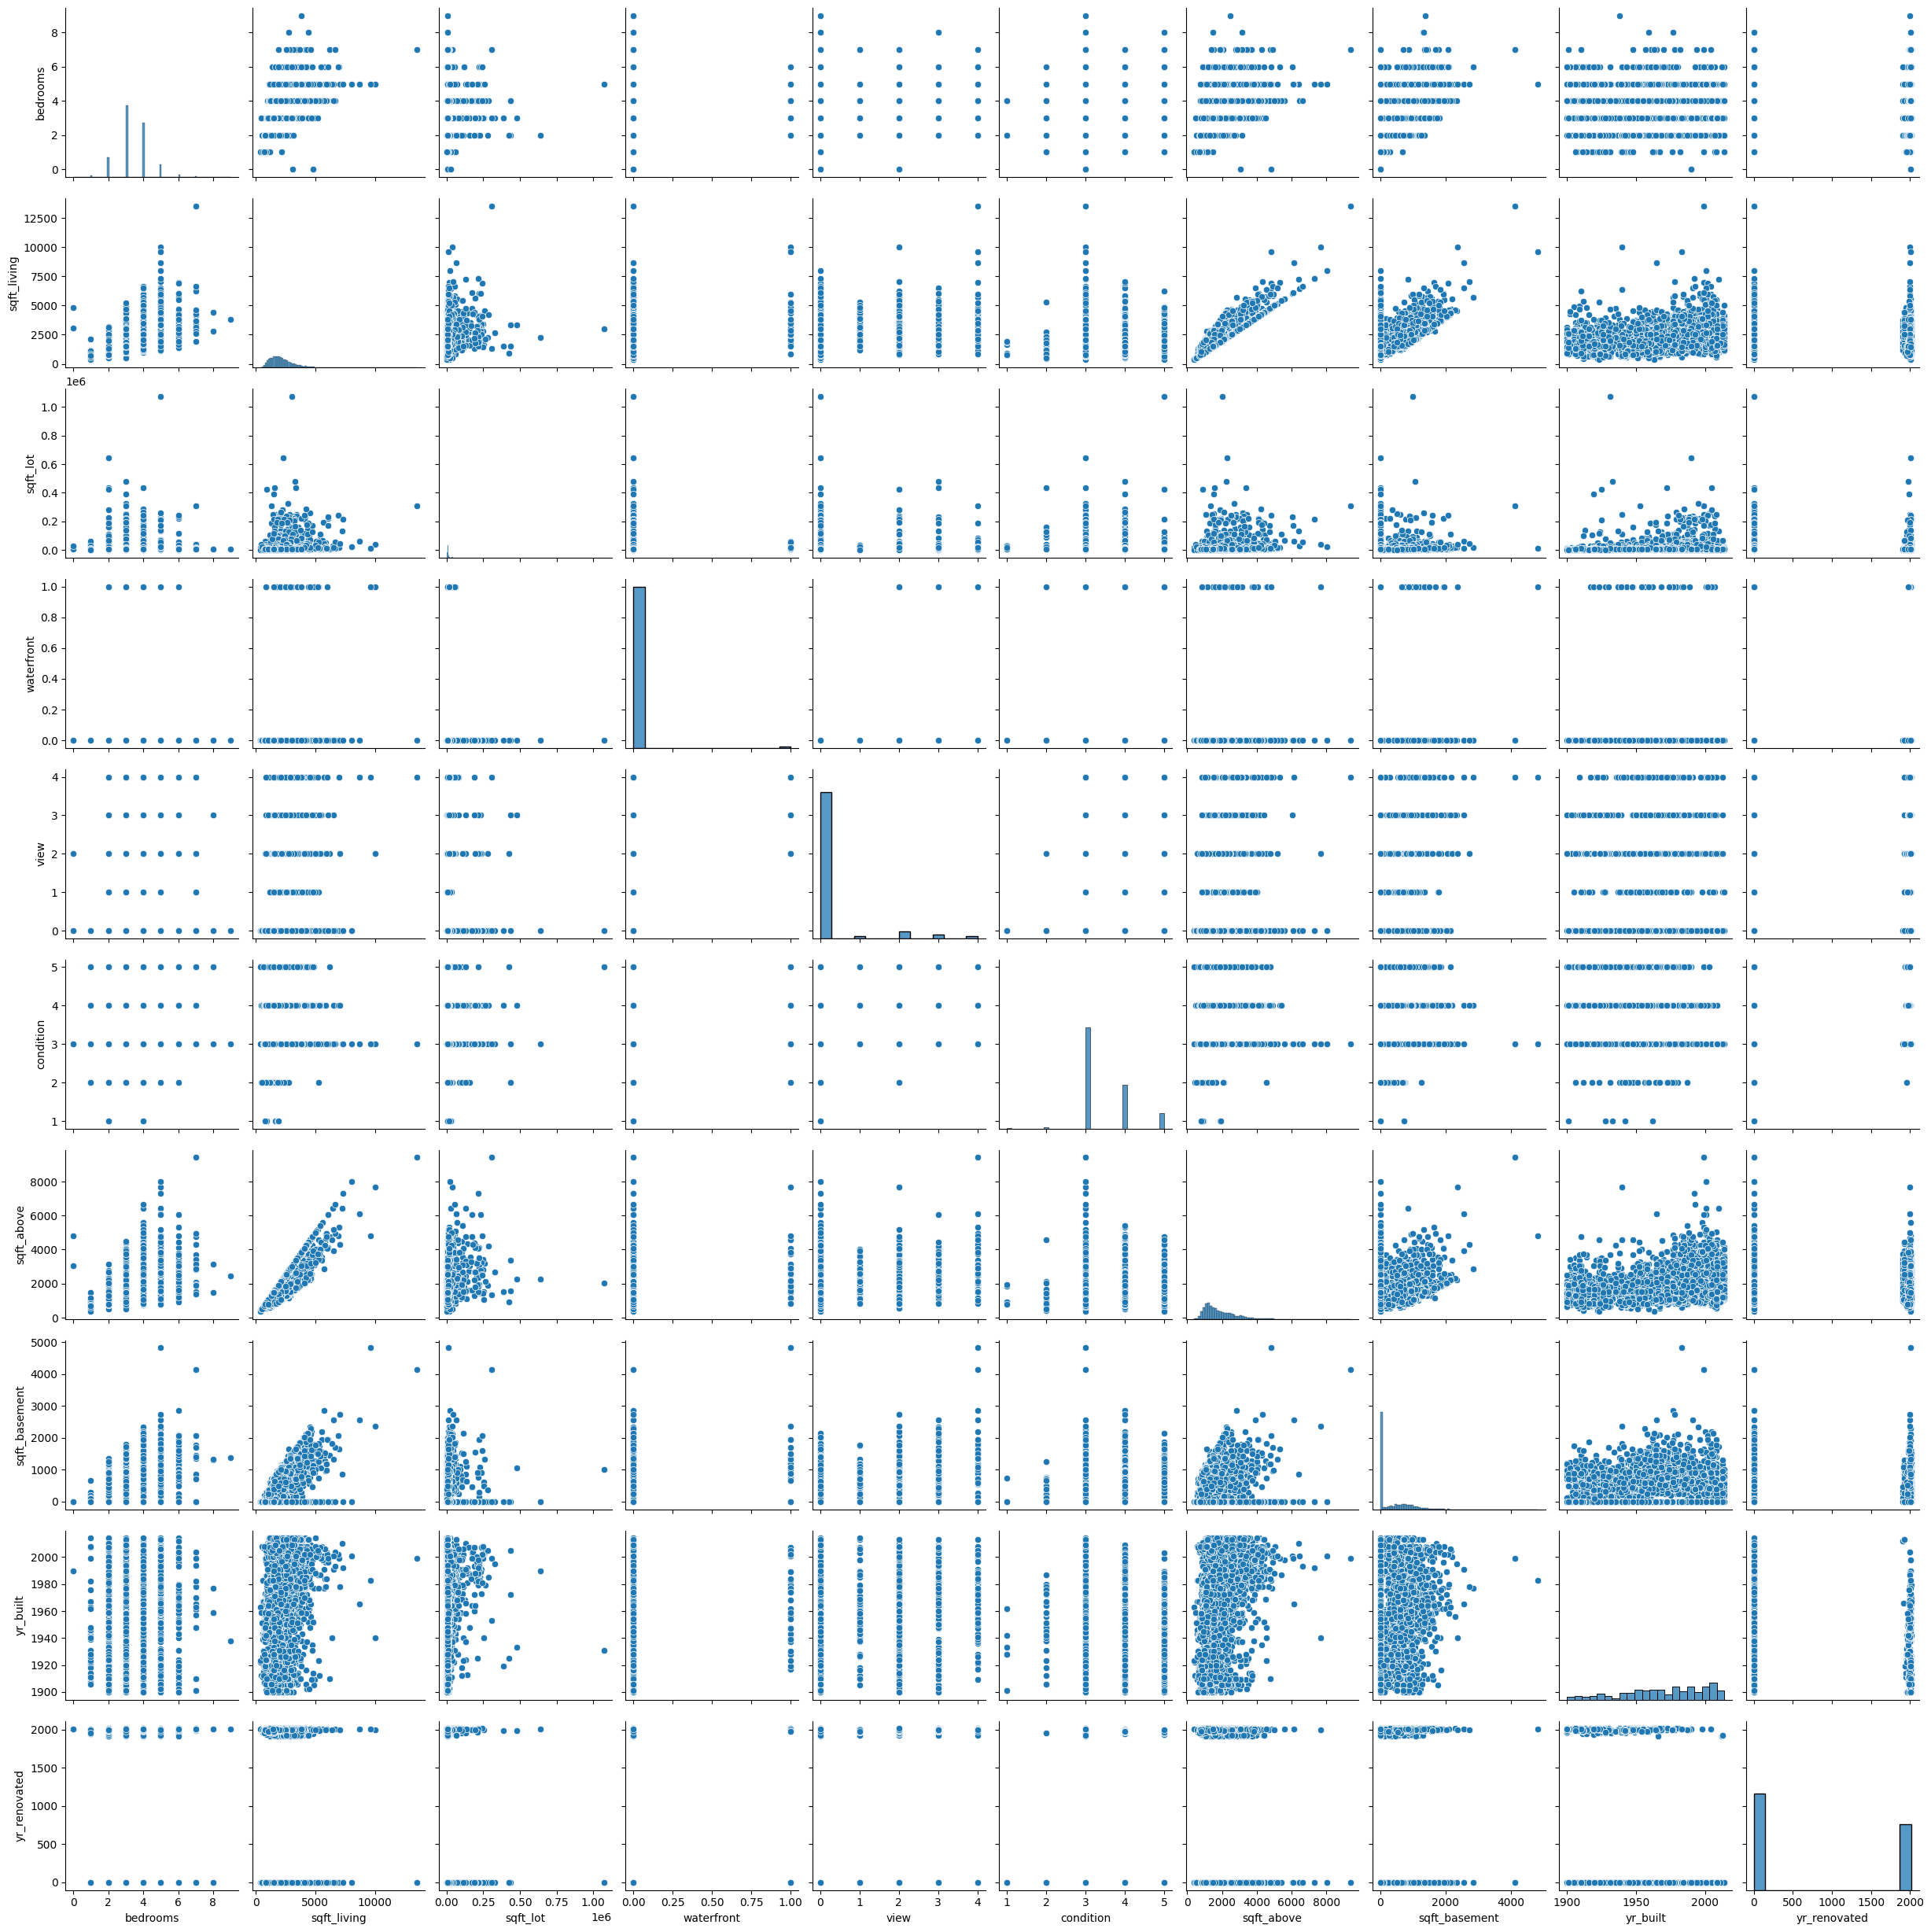

In [11]:
sns.pairplot(numerical_data)

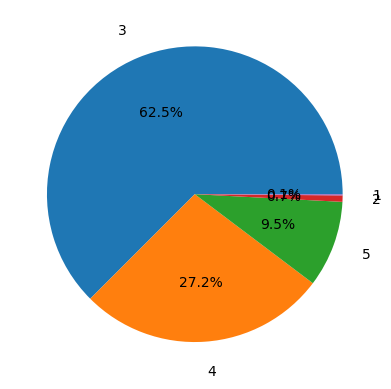

In [12]:
plt.pie(count,labels=index,autopct='%1.1f%%',labeldistance=1.2,)
plt.show()

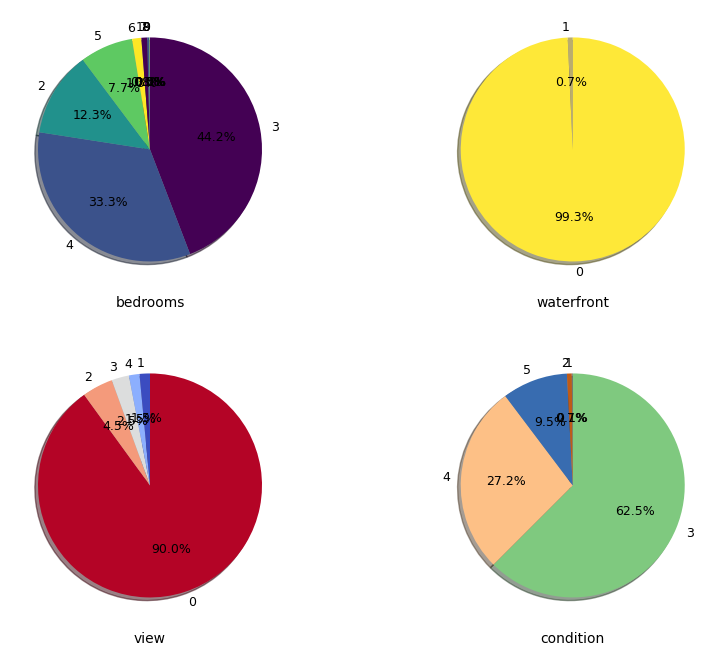

In [13]:
plt.figure(figsize=(10,8))

color1=plt.cm.viridis(np.linspace(0, 1, len(index)))
color2=plt.cm.cividis_r(np.linspace(0, 1, len(index)))
color3=plt.cm.coolwarm_r(np.linspace(0, 1, len(index)))
color4=plt.cm.Accent(np.linspace(0, 1, len(index)))


plt.subplot(2,2,1)
count=df['bedrooms'].value_counts()
index=count.index
size=count.values
plt.pie(count,labels=index,autopct='%1.1f%%',startangle=90,shadow=True,center=(0,0),
        labeldistance=1.097,radius=1,counterclock=False,textprops={'fontsize': 9},colors=color1)
plt.xlabel('bedrooms')

plt.subplot(2,2,2)
count=df['waterfront'].value_counts()
index=count.index
size=count.values
plt.pie(count,labels=index,autopct='%1.1f%%',startangle=90,shadow=True,center=(0,0),
        labeldistance=1.097,radius=1,counterclock=False,textprops={'fontsize': 9},colors=color2)
plt.xlabel('waterfront')


plt.subplot(2,2,3)
count=df['view'].value_counts()
index=count.index
size=count.values
plt.pie(count,labels=index,autopct='%1.1f%%',startangle=90,shadow=True,center=(0,0),
        labeldistance=1.097,radius=1,counterclock=False,textprops={'fontsize': 9},colors=color3)
plt.xlabel('view')


plt.subplot(2,2,4)
count=df['condition'].value_counts()
index=count.index
size=count.values
plt.pie(size,labels=index,autopct='%1.1f%%',startangle=90,shadow=True,center=(0,0),
        labeldistance=1.097,radius=1,counterclock=False,textprops={'fontsize': 9},colors=color4)
plt.xlabel('condition')
plt.show()

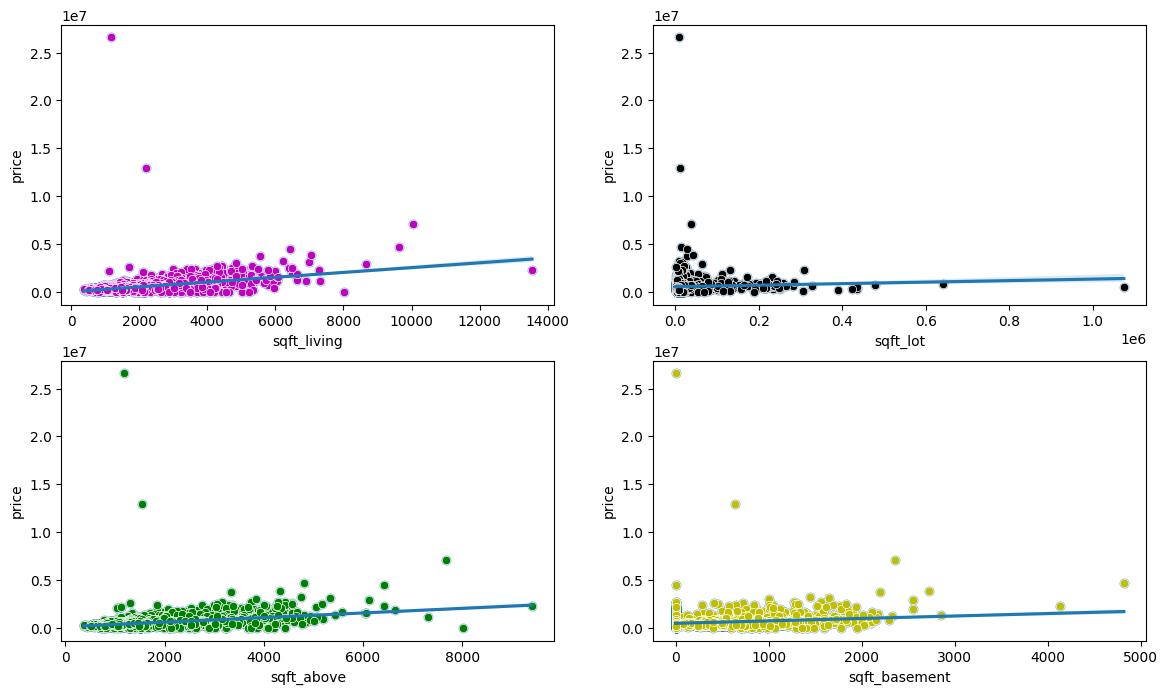

In [14]:
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
sns.regplot(data=df, x='sqft_living', y='price')
sns.scatterplot(data=df,x='sqft_living',y='price',c='m')

plt.subplot(2,2,2)
sns.regplot(data=df, x='sqft_lot', y='price')
sns.scatterplot(data=df,x='sqft_lot',y='price',c='black')


plt.subplot(2,2,3)
sns.regplot(data=df, x='sqft_above', y='price')
sns.scatterplot(data=df,x='sqft_above',y='price',c='g')


plt.subplot(2,2,4)
sns.regplot(data=df, x='sqft_basement', y='price')
sns.scatterplot(data=df,x='sqft_basement',y='price',c='y')
plt.show()

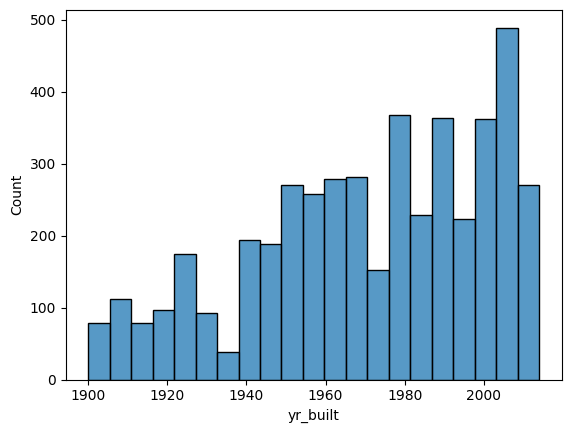

In [15]:
sns.histplot(df['yr_built'])
plt.show()

In [16]:
import pandas as pd

# Assuming df is your DataFrame and 'yr_built' is a column containing years as integers or strings
df['year'] = pd.to_datetime(df['yr_built'], format='%Y')
Expected = df['year'].dt.year
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,year
0,02-05-2014 00:00,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,1955-01-01
1,02-05-2014 00:00,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,1921-01-01
2,02-05-2014 00:00,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,1966-01-01
3,02-05-2014 00:00,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,1963-01-01
4,02-05-2014 00:00,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,1976-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,09-07-2014 00:00,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,1954-01-01
4596,09-07-2014 00:00,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,1983-01-01
4597,09-07-2014 00:00,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,2009-01-01
4598,10-07-2014 00:00,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,1974-01-01


In [17]:
current_month=dt.datetime.now().month
current_year=dt.datetime.now().year
current_day=dt.datetime.now().day
print(current_month)
print(current_year)
print(current_day)

3
2024
5


In [18]:
Name_month=dt.datetime.now().strftime('%B')
Name_day = dt.datetime.now().strftime("%A")
print(Name_month)
print(Name_day)

March
Tuesday


# Convert  numerical feature to categorical feature

In [19]:
from sklearn.preprocessing import  LabelEncoder
encd=LabelEncoder()
df['city']=encd.fit_transform(df['city'])

In [20]:
df['price']=df['price'].astype('int')

In [21]:
new_numerical_data=df.select_dtypes('int')
new_numerical_data

,price,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000,3,1340,7912,0,0,3,1340,0,1955,2005,36
1,2384000,5,3650,9050,0,4,5,3370,280,1921,0,35
2,342000,3,1930,11947,0,0,4,1930,0,1966,0,18
3,420000,3,2000,8030,0,0,4,1000,1000,1963,0,3
4,550000,4,1940,10500,0,0,4,1140,800,1976,1992,31
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,308166,3,1510,6360,0,0,4,1510,0,1954,1979,35
4596,534333,3,1460,7573,0,0,3,1460,0,1983,2009,3
4597,416904,3,3010,7014,0,0,3,3010,0,2009,0,32
4598,203400,4,2090,6630,0,0,3,1070,1020,1974,0,35


<Axes: >

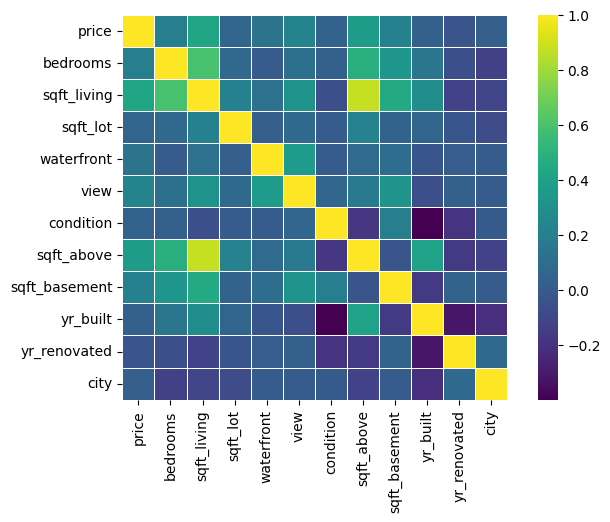

In [22]:
correlation = new_numerical_data.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation,cmap='viridis',linewidths=0.4,square=True)

# Split Data Into XY

In [23]:
df.drop(columns=["country", "statezip","street",'date','city','year'], inplace=True)

In [24]:
# X.info()

NameError: name 'X' is not defined

In [25]:
df1 = df
# Assuming df is your DataFrame
# X = df1.drop('price', axis=1)  # Replace 'target_column' with the name of your target column
X=df1[['sqft_living','sqft_lot','sqft_above','sqft_basement','bedrooms','bathrooms','floors','waterfront','view','condition','yr_renovated','yr_built']]
y = df1['price']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2990, 12)
(1610, 12)
(2990,)
(1610,)


# Feature Scaling 

In [27]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

# Implement Linear Regression Model

In [28]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
linear_predict=linear_model.predict(X_test_scaled)
# Evaluate Method

r2_scorelm=r2_score(y_test,linear_predict)
mse_lm=mean_squared_error(y_test,linear_predict)

print("R2 Linear Score:", r2_scorelm)
print("MSE  Linear Score:", mse_lm)

R2 Linear Score: 0.07139862806848607
MSE  Linear Score: 588284589567.7484


### A) Lasso

In [29]:
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train_scaled, y_train)

lasso_predictions = lasso_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_absolute_error(y_test, lasso_predictions)
r2_scorela=r2_score(y_test,lasso_predictions)

print(f"Mean Squared Error: {mse}")
print(f"r2_score: {r2_scorela}")

Mean Squared Error: 188553.8635841189
r2_score: 0.07241829727520932


### A) Ridge

In [30]:
ridge_model = Ridge(alpha=0.4,copy_X=True)
ridge_model.fit(X_train_scaled, y_train)

ridge_predictions = ridge_model.predict(X_test_scaled)

# Evaluate the model
mse_ri = mean_absolute_error(y_test, ridge_predictions)
r2_ri=r2_score(y_test,ridge_predictions)

print(f"Mean Squared Error: {mse_ri}")
print(f"r2_score: {r2_ri}")

Mean Squared Error: 188547.6729826417
r2_score: 0.07242724344681428


In [31]:
from sklearn.preprocessing import PolynomialFeatures
poliynimial_model=PolynomialFeatures(degree=2)

X_train_poly = poliynimial_model.fit_transform(X_train)
X_test_poly = poliynimial_model.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.03938951210708597


# Implement XGB Regression Model

In [32]:
from xgboost import XGBRegressor
xgb_model=XGBRegressor()
xgb_model.fit(X_train_scaled,y_train)
xgb_prediction=xgb_model.predict(X_test_scaled)

mse_xbg = mean_absolute_error(y_test, xgb_prediction)
r2_xgb=r2_score(y_test,xgb_prediction)

print(f"Mean Squared Error: {mse_xbg}")
print(f"r2_score: {r2_xgb}")

Mean Squared Error: 192437.79829677794
r2_score: 0.04902183556676143


# Implement Random Forest Regression Model

In [33]:
from sklearn.ensemble import RandomForestRegressor
random_model=RandomForestRegressor()
random_model.fit(X_train_scaled,y_train)
random_predict= random_model.predict(X_test_scaled)

mse_random = mean_absolute_error(y_test, random_predict)
r2_random=r2_score(y_test,random_predict)

print(f"Mean Squared Error: {mse_random}")
print(f"r2_score: {r2_random}")

Mean Squared Error: 185087.30680124226
r2_score: 0.06633040742530683


# HyperParameter Tuning

In [ ]:
from sklearn.ensemble import 